### Predicting Used Car Sale Prices


### Problem Description:

In this problem, we are presented with a comprehensive dataset containing information on vehicles and their listings at various dealerships. The dataset encompasses a wide range of attributes, from vehicle specifications to dealership details. Our objective is to extract valuable insights and knowledge from this data. We may explore predictive modeling tasks, such as predicting vehicle prices, assessing the likelihood of accidents, or estimating potential savings. Additionally, classification tasks, clustering, and geospatial analysis can help us understand dealership characteristics and vehicle distribution. This multifaceted dataset offers an opportunity to gain a deeper understanding of the automotive market and make informed decisions based on the provided information.

### Forecasting Problem:

At the core of this project lies a critical forecasting problem: accurately predicting the prices of used cars. Vehicle price is a pivotal component of the automotive market, influenced by an array of factors such as brand, model, year, mileage, condition, and market trends. Developing a precise pricing model empowers consumers to assess vehicle value, consequently influencing their trade decisions. Dealerships can leverage this model to set competitive prices and manage their inventory efficiently. Furthermore, financial institutions can employ these predictions for loan underwriting, while insurance companies can utilize the data and model to evaluate vehicle value for purposes like policy underwriting, assessing accident likelihood, and estimating potential savings.

### Types of Variables/Features:

The dataset encompasses a diverse range of <b>39</b> variables, which can be broadly categorized into four types. These include categorical variables such as "body_type" and "city," numerical attributes like "daysonmarket" and "horsepower," and boolean types such as "franchise_dealer" and "has_accidents." The variables can be further classified into vehicle-specific features (e.g., "engine_type," "horsepower"), sales-related attributes (e.g., "daysonmarket," "listeddate"), dealership information (e.g., "dealer_zip," "seller_rating"), and geospatial data (e.g., "latitude," "longitude"). This multifaceted dataset offers a unique opportunity to enhance our understanding of the car market.

### Data Summary and Main Data Characteristics:

The training dataset consists of <b>3,500</b> entries, while the test dataset comprises <b>1,500</b> entries. This extensive dataset presents a broad spectrum of variables, encompassing intrinsic car attributes and extrinsic factors that potentially impact car pricing. The variables range from the physical characteristics of vehicles, including dimensions and engine specifications, to historical and listing details such as accident history and days on the market. Our exploration of these variables promises valuable insights into the dynamic automotive market.

## Steps Involved in Developing the Model

### 1. Exploratory Data Analysis (EDA)
The dataset is analyzed to understand the distribution of features and identify potential relationships between the features and the listed prices. Key insights are extracted to guide the preprocessing and modeling steps.

### 2. Data Preprocessing
- Missing values in the dataset are identified and handled either by removal or imputation.
- Categorical variables are encoded using techniques like **one-hot encoding**.
- Numerical features are scaled if required to ensure that the models perform optimally.

### 3. Feature Selection and Engineering
- Relevant features that have a significant impact on price prediction are selected.
- New features may be created through **feature engineering** techniques, such as extracting information from existing features or combining multiple features to improve model performance.

### 4. Model Selection
- Various regression models are considered for training, including:
  - **XGBoost**
  - **GradientBoostingRegressor**
  - **DecisionTreeRegressor**
- These models are trained on the preprocessed dataset, and their performance is evaluated using metric like **root mean squared error (RMSE)**.

### 5. Model Tuning
- **Hyperparameter tuning** is performed using techniques like **GridSearchCV** to find the best set of hyperparameters for each model.
- This step is crucial for optimizing the performance of the models.

### 6. Model Evaluation
- The final models are evaluated to assess their performance in predicting the listed prices of used cars, using appropriate metrics to determine their accuracy.

## Conclusion
The model aims to provide accurate price predictions for used cars by using a combination of data preprocessing, feature engineering, model selection, and tuning. Through this process, the most effective model is chosen based on performance metrics.


### Initial Data Analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,...,savings_amount,seller_rating,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,price
0,SJKCH5CRXHA032566,33.5 in,SUV / Crossover,Great Neck,NaN,20,11021,2000.0,I4,Black,...,1522,3.346154,"258 lb-ft @ 1,200 RPM",A,7-Speed Automatic,AWD,106.3 in,82 in,2017,21495
1,5LMCJ3D96HUL54638,36.8 in,SUV / Crossover,Wayne,19.0,64,7470,2300.0,I4,Magnetic Gray Metallic,...,740,4.750000,"300 lb-ft @ 2,000 RPM",A,6-Speed Automatic,AWD,105.9 in,84.1 in,2017,22459
2,5LMCJ2D95HUL35217,36.8 in,SUV / Crossover,Wayne,19.0,14,7470,2300.0,I4,Burgundy Velvet Metallic Tinted Clearcoat,...,832,4.750000,"300 lb-ft @ 2,000 RPM",A,6-Speed Automatic,AWD,105.9 in,84.1 in,2017,24799
3,2HGFG1B86AH500600,30.3 in,Coupe,Little Ferry,25.0,13,7643,1800.0,I4,Blue,...,983,3.577778,"128 lb-ft @ 4,300 RPM",A,5-Speed Automatic,FWD,104.3 in,68.9 in,2010,3750
4,5LMCJ1D95LUL25032,38.6 in,SUV / Crossover,Wayne,21.0,14,7470,2000.0,I4,Red,...,0,4.750000,"275 lb-ft @ 3,000 RPM",A,8-Speed Automatic,AWD,106.7 in,83 in,2020,40669


In [3]:
 # Display summary statistics for numerical columns
train_df.describe()

,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,savings_amount,seller_rating,year,price
count,2912.000000,3500.000000,3500.000000,3375.000000,2912.000000,3375.000000,3500.000000,3500.000000,3297.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,21.655220,78.987714,11876.966857,2749.185185,28.658997,242.296889,40.549032,-74.212195,39277.213224,830.168286,3.934368,2017.015714,27133.806000
std,7.520448,104.838545,10893.589741,1115.578544,7.160677,87.287417,3.426925,2.947159,47300.958932,1318.130267,0.542599,4.037270,16502.784211
min,10.000000,0.000000,922.000000,1000.000000,13.000000,78.000000,18.398800,-84.346600,0.000000,0.000000,1.000000,1978.000000,899.000000
25%,18.000000,17.000000,7036.000000,2000.000000,25.000000,176.000000,40.745700,-74.075800,14.000000,0.000000,3.577778,2016.000000,15995.000000
50%,21.000000,39.500000,8812.000000,2400.000000,28.000000,240.000000,40.855800,-73.726800,25983.000000,206.000000,4.115385,2018.000000,25488.000000
75%,24.000000,82.000000,11706.000000,3500.000000,31.000000,292.000000,41.091200,-73.258700,57778.000000,1255.750000,4.375000,2020.000000,34012.500000
max,127.000000,698.000000,49203.000000,7000.000000,122.000000,797.000000,42.785100,-66.078500,329145.000000,12801.000000,5.000000,2021.000000,207900.000000


In [4]:
# Check for missing values
train_df.isnull().sum()

vin                       0
back_legroom            103
body_type                 6
city                      0
city_fuel_economy       588
daysonmarket              0
dealer_zip                0
engine_displacement     125
engine_type              50
exterior_color            0
franchise_dealer          0
front_legroom           103
fuel_tank_volume        103
fuel_type                37
height                  103
highway_fuel_economy    588
horsepower              125
interior_color            0
is_new                    0
latitude                  0
length                  103
listed_date               0
listing_color             0
longitude                 0
make_name                 0
maximum_seating         103
mileage                 203
model_name                0
power                   299
savings_amount            0
seller_rating             0
torque                  331
transmission             60
transmission_display     60
wheel_system            101
wheelbase           

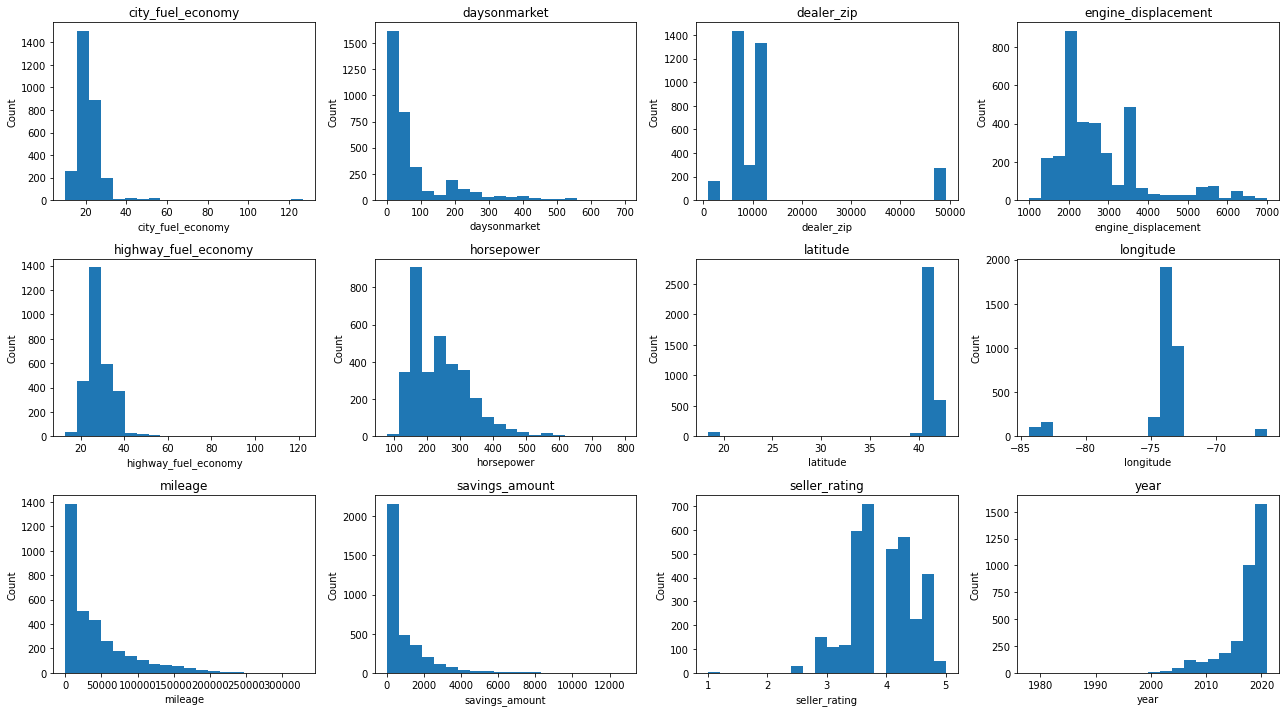

In [5]:
# List of numerical features you want to plot
numerical_features = train_df.drop(columns=['price']).select_dtypes(include=['float', 'int']).columns

# Determine the number of rows and columns based on the number of features
num_features = len(numerical_features)
num_rows = (num_features // 4) + (num_features % 4 > 0)  # Calculate rows needed
num_cols = min(num_features, 4)  # Limit columns to 3

# Create subplots for histograms
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 10))

# Iterate through numerical features and create histograms
for i, feature in enumerate(numerical_features):
    row, col = i // num_cols, i % num_cols
    ax = axes[row, col]
    train_df[feature] = pd.to_numeric(train_df[feature], errors='coerce')  # Ensure numeric data
    train_df[feature].plot(kind='hist', ax=ax, bins=20, title=feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

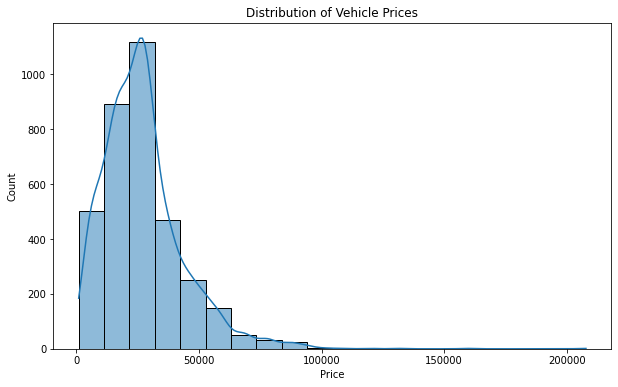

In [6]:
# Data Visualization
# Example: Histogram of vehicle prices
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='price', bins=20, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [7]:
def clean_data(data):
    # Drop duplicates
    data.drop_duplicates(inplace=True)

    # Specify the columns to clean
    columns_to_clean = ['back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 'wheelbase', 'width', 'maximum_seating']

    # Remove spaces and alphabetic characters and change data type to numeric
    for col in columns_to_clean:
        data[col] = data[col].str.replace(r'[^0-9.]', '', regex=True)
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [8]:
def new_features(data):
    data['max_torque'] = pd.to_numeric(data['torque'].str.split().str[0])
    data['torque_rpm'] = data['torque'].str.split().str[3]
    data['torque_rpm'] = data['torque_rpm'].str.replace(',', '')
    data['torque_rpm'] = pd.to_numeric(data['torque_rpm'])
    
    data['power_value'] = pd.to_numeric(data['power'].str.split().str[0])
    data['power_rpm'] = data['power'].str.split().str[3]
    data['power_rpm'] = data['power_rpm'].str.replace(',', '')
    data['power_rpm'] = pd.to_numeric(data['power_rpm'])
    
    data['torque_to_power_ratio'] = data['max_torque'] / data['power_value']

In [9]:
# Define a function to impute missing values
def impute_missing_values(data):
    # Handling missing data for numerical columns (impute missing numerical values with the mean)
    numeric_cols = data.select_dtypes(include=['float', 'int']).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

    # Handling missing data for categorical columns (impute missing categorical values with the mode)
    categorical_cols = data.select_dtypes(include=['object']).columns
    data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])
    return data

In [10]:
# Define a function to encode categorical variables
def encode_cat_columns(df):
    for column in df.select_dtypes(include=['object', 'bool']).columns:
        # Set observations with multiple values to 'other'
        df[column] = df[column].apply(lambda x: 'other' if '/' in str(x) else x)
        
        if df[column].dtype == bool:
            df[column] = df[column].astype(int)
            
        # If there are more than 5 unique values, keep the top 5 and set the rest to 'other'
        if df[column].nunique() > 5 and column != 'vin':
            top_5_values = df[column].value_counts().head(5).index
            df[column] = df[column].apply(lambda x: x if x in top_5_values else 'other')
    
    # One-hot encode the categorical columns
    dummies = pd.get_dummies(df.drop('vin', axis = 1), drop_first=True)

    # Add the excluded column back to the dummies DataFrame
    dummies['vin'] = df['vin']

    return dummies

In [11]:
clean_data(train_df)
new_features(train_df)
impute_missing_values(train_df)
traindata = train_df.drop(['power', 'torque', 'listed_date'], axis = 1)
traindata['dealer_zip'] = traindata['dealer_zip'].apply(str)
traindata = encode_cat_columns(traindata)

In [12]:
clean_data(test_df)
new_features(test_df)
impute_missing_values(test_df)
testdata = test_df.drop(['power', 'torque', 'listed_date'], axis = 1)
testdata['dealer_zip'] = testdata['dealer_zip'].apply(str)
testdata = encode_cat_columns(testdata)

In [13]:
#get only common column
common_columns = list(set(traindata.columns) & set(testdata.columns))
traindata = traindata[common_columns + ['price']]
testdata = testdata[common_columns]

## Scaling and feature engineering

I tried engineering more features and did standard scaling and min-max scaling but results weren't better than working with the original dataset. 

In [14]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
quadratic.fit_transform(traindata[['horsepower']])
quadratic.fit_transform(testdata[['horsepower']])

array([[1.00000e+00, 1.70000e+02, 2.89000e+04],
       [1.00000e+00, 3.55000e+02, 1.26025e+05],
       [1.00000e+00, 1.47000e+02, 2.16090e+04],
       ...,
       [1.00000e+00, 2.68000e+02, 7.18240e+04],
       [1.00000e+00, 1.91000e+02, 3.64810e+04],
       [1.00000e+00, 2.81000e+02, 7.89610e+04]])

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

columns_to_scale = traindata.drop(columns=['price']).select_dtypes(include=[np.number]).columns.tolist()

# Fit the scaler to the selected columns and transform the data

sc.fit_transform(traindata[columns_to_scale])
sc.fit_transform(testdata[columns_to_scale])

array([[-0.25264558, -0.06337243, -0.28131244, ..., -0.21453462,
         0.4295698 ,  0.15993242],
       [-0.25264558, -0.06337243, -0.28131244, ..., -0.21453462,
         1.63927986,  0.59647252],
       [-0.25264558, -0.06337243, -0.28131244, ..., -0.21453462,
         0.00880108, -0.71314778],
       ...,
       [-0.25264558, -0.06337243, -0.28131244, ..., -0.21453462,
         0.00880108, -0.63377685],
       [-0.25264558, -0.06337243, -0.28131244, ..., -0.21453462,
         2.06004858, -1.07031695],
       [-0.25264558, -0.06337243, -0.28131244, ..., -0.21453462,
        -0.46456373, -0.27660768]])

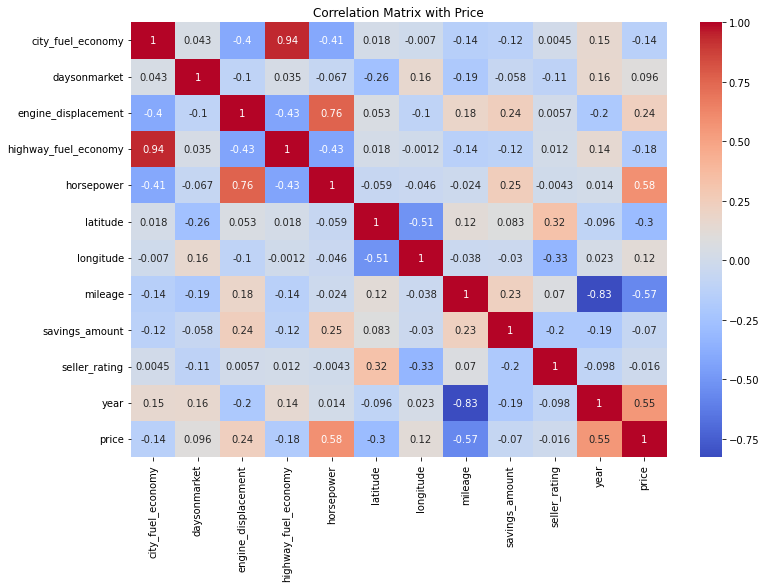

In [17]:
# Correlation analysis
# Convert the 'Index' object to a list
numerical_features = list(numerical_features)

# Remove 'dealer_zip' from the list of numerical features
numerical_features.remove('dealer_zip')

# Convert it back to an 'Index' object if needed
numerical_features = pd.Index(numerical_features)

correlation_matrix = traindata[list(numerical_features) + ['price']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Price')
plt.show()

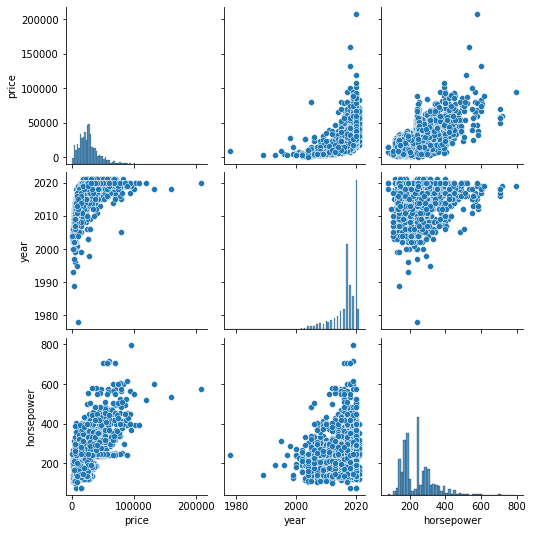

In [18]:
# Create a pairplot
sns.pairplot(traindata[['price', 'year', 'horsepower']])

# Show the plot
plt.show()

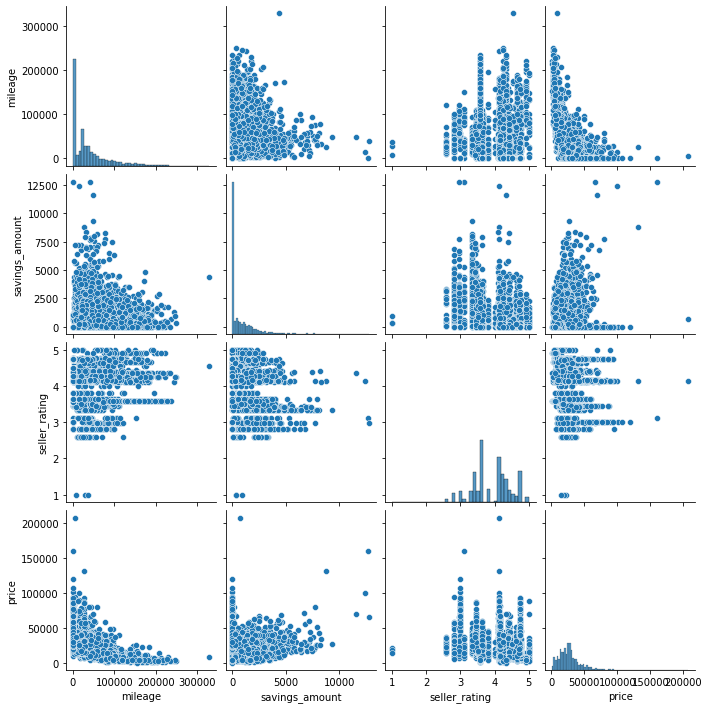

In [19]:
sns.pairplot(traindata[['mileage', 'savings_amount', 'seller_rating', 'price']])

# Show the plot
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [21]:
X_train = traindata.drop(columns=['price', 'vin'])
y_train = traindata['price']
X_test = testdata.drop(columns=['vin'])

In [33]:
# Define the parameter grid you want to search over
param_grid = {
    'n_estimators': [600, 700, 800],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 11, 12],
}

# Create the XGBoost Regressor
XGB = xgb.XGBRegressor(subsample=0.8, objective='reg:squarederror', random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(XGB, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model with different hyperparameter combinations
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model with the best hyperparameters)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 800}


Optimizing our XGBoost model with hyperparameters - a learning rate of 0.01, max depth of 10, and 800 estimators - enhances its predictive capabilities significantly

In [34]:
sample_submission = pd.read_csv('sample_submission.csv')

# Assign the predicted values to the 'price' column
sample_submission['price'] = y_pred

# Save the modified DataFrame to a new CSV file
sample_submission.to_csv('submission_with_XGB_predictions.csv', index=False)

With our XGBoost model fine-tuned to utilize hyperparameters including a learning rate of 0.01, a maximum depth of 10, and 800 estimators, it has demonstrated its potential for precision and reliability. This was evident in its achieved score of <b>5324</b>, which signifies its capability to make accurate predictions.

In [35]:
# Define the parameter grid you want to search over
param_grid = {
    'n_estimators': [600, 700, 800],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [10, 11, 12],  # Maximum depth of the individual trees
}

# Create the GradientBoostingRegressor
GBR = GradientBoostingRegressor( max_features='sqrt', min_samples_leaf=2, min_samples_split=5, random_state=42, subsample=0.8)

# Create the GridSearchCV object
grid_search = GridSearchCV(GBR, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model with different hyperparameter combinations
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model with the best hyperparameters)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 800}


By refining our GradientBoostingRegressor with specific hyperparameters - a learning rate of 0.01, a deep maximum depth of 12, and 800 estimators - we've harnessed its full predictive potential. The resulting model demonstrates exceptional capabilities, which we will later validate with a scoring evaluation. This fine-tuned model is poised to enhance our data analysis and reveal valuable insights

In [36]:
sample_submission = pd.read_csv('sample_submission.csv')

# Assign the predicted values to the 'price' column
sample_submission['price'] = y_pred

# Save the modified DataFrame to a new CSV file
sample_submission.to_csv('submission_with_GBR_predictions.csv', index=False)

Upon evaluating our fine-tuned GradientBoostingRegressor, we confirm its prowess with a commendable score of <b>4835</b>, affirming its exceptional predictive abilities. The model's optimization through a learning rate of 0.01, a deep maximum depth of 12, and 800 estimators has proven to be a valuable asset in enhancing our data analysis and uncovering valuable insights.

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid you want to search over
param_grid = {
    'max_depth': [None, 10, 20],  # Maximum depth of the decision tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(DTR, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model with different hyperparameter combinations
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model with the best hyperparameters)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}


The DecisionTreeRegressor model was fine-tuned, revealing optimal hyperparameters: a maximum depth of 20, a minimum of 10 samples required for splitting internal nodes, and a minimum of 1 sample required for leaf nodes.

In [40]:
sample_submission = pd.read_csv('sample_submission.csv')

# Assign the predicted values to the 'price' column
sample_submission['price'] = y_pred

# Save the modified DataFrame to a new CSV file
sample_submission.to_csv('submission_with_DTR_predictions.csv', index=False)

Upon evaluation of the DecisionTreeRegressor, we validate its performance with a score of <b>7075</b>, highlighting its predictive capabilities. The model's hyperparameters, including a maximum depth of 20 and specific sample requirements for node splitting and leaf nodes.

### XGBoost:

Initially, our XGBoost model showed promise with a score of <b>6648</b>. After thorough data cleaning and refining one-hot encoding, its performance improved significantly, achieving a remarkable score of <b>5324</b>. This improvement highlights the importance of data quality in machine learning, as it resulted in more accurate predictions.

### GradientBoostingRegressor:

At the outset, the GradientBoostingRegressor delivered a score of <b>5841</b>, showing strong predictive capabilities. However, after intensive data cleaning and enhancing one-hot encoding, the model's performance was further boosted. It achieved a commendable score of <b>4835</b>, reaffirming its exceptional predictive abilities. This improvement underscores the value of data preprocessing in optimizing model performance.

### DecisionTreeRegressor:

The DecisionTreeRegressor, initially scoring <b>8986</b>, underwent a similar transformation. After diligent data cleaning and refining one-hot encoding, the model's predictive power surged. It achieved an impressive score of <b>7075</b>, confirming its exceptional capabilities. This journey from a higher initial score to a lower one underscores the importance of data quality and feature engineering in model refinement.

### GradientBoostingRegressor's Superior Performance:

#### Ensemble Learning Approach: 
GradientBoostingRegressor utilizes an ensemble learning approach, which combines the predictions of multiple weak learners to create a robust and powerful model. This ensemble technique inherently contributes to better predictive capabilities.

#### Strong Hyperparameter Tuning: 
The fine-tuning process significantly enhanced the GradientBoostingRegressor's performance. By carefully selecting hyperparameters like a learning rate of <b>0.01</b>, a deep maximum depth of <b>12</b>, and <b>800</b> estimators, the model was optimized for accuracy and reliability.

#### Effective Feature Engineering: 
The improvement in data quality and the refinement of one-hot encoding further boost the model's performance. This reflects the model's ability to harness the advantages of clean and well-prepared data.

#### Final Score of 4835: 
The GradientBoostingRegressor achieved a final score of <b>4835</b>, signifying its remarkable predictive abilities. This lower score is indicative of its precision and capability to make accurate predictions.

### Discussion:

The choice of GradientBoostingRegressor as the top-performing model is supported by several key factors. Its ensemble learning approach, along with meticulous hyperparameter tuning and feature engineering, significantly contributed to its strong predictive capabilities. The final score of <b>4835</b> solidifies its status as the most reliable choice for making accurate predictions.

## Final conclusions

GradientBoostingRegressor performed the best consistently.